In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2023-02-23 13:30:08.214801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from imports_for_ML import load_images


ModuleNotFoundError: No module named 'imports_for_ML'

In [5]:
import os

img_dir = r'/Users/olamichalowska/Documents/python_class/10_CNN/train'
images = os.listdir(img_dir)
images[:3]

['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg']

In [6]:
full_images = [os.path.join(img_dir, img) for img in images]

In [7]:
full_images[:3]

['/Users/olamichalowska/Documents/python_class/10_CNN/train/dog.8011.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/cat.5077.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/dog.7322.jpg']

In [8]:
len(full_images)

25000

In [9]:
full_images

['/Users/olamichalowska/Documents/python_class/10_CNN/train/dog.8011.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/cat.5077.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/dog.7322.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/cat.2718.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/cat.10151.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/cat.3406.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/dog.1753.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/cat.4369.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/cat.7660.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/dog.5535.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/cat.8553.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/cat.9895.jpg',
 '/Users/olamichalowska/Documents/python_class/10_CNN/train/cat.1211.jpg',
 '/Users/olamichalowska/

Text(0.5, 1.0, 'dog.3679.jpg')

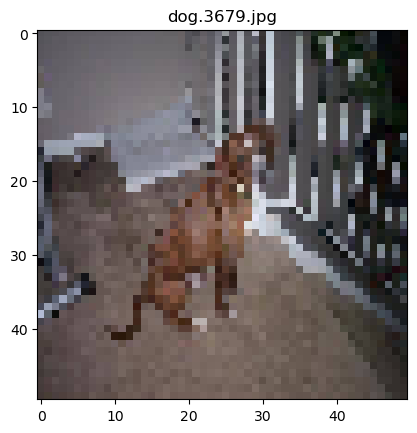

In [10]:
image_index = 12523
img = load_img(full_images[image_index], target_size=(50, 50))
plt.imshow(img)
plt.title(images[image_index])

(-0.5, 364.5, 337.5, -0.5)

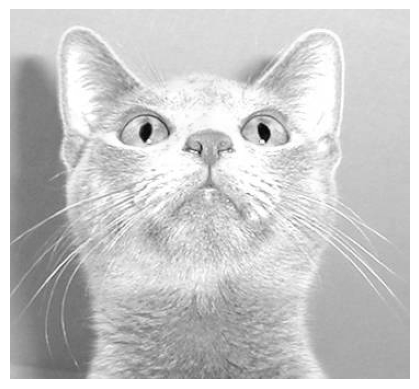

In [11]:
image_index = 1197
test_image = img_to_array(load_img(full_images[image_index]))


test_image_gr = test_image.mean(axis=2)


plt.imshow(test_image_gr, cmap='gray')

plt.axis('off')

(-0.5, 2.5, 2.5, -0.5)

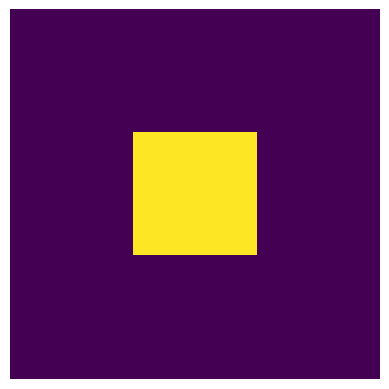

In [12]:
# we create a filter - it's a matrix of numerical values
kernel1 = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
# we display a filter - we use imshow to display the matrix as an image
plt.imshow(kernel1)
plt.axis('off')

In [13]:
from scipy.signal import convolve2d

(-0.5, 366.5, 339.5, -0.5)

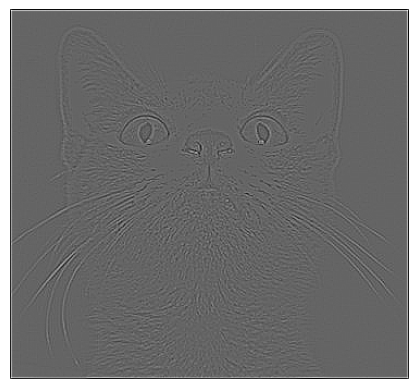

In [14]:
convolved_image1 = convolve2d(test_image_gr, kernel1)

plt.imshow(convolved_image1, cmap='gray')
plt.axis('off')

(-0.5, 2.5, 2.5, -0.5)

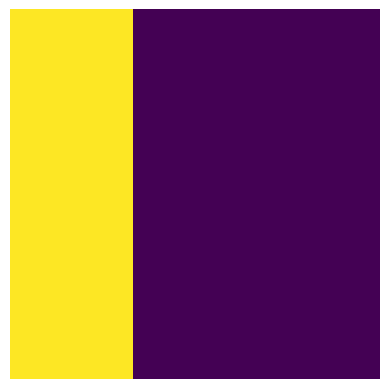

In [15]:
kernel2 = np.array([[2, -1, -1],
                    [2, -1, -1],
                    [2, -1, -1]])
plt.imshow(kernel2)
plt.axis('off')

(-0.5, 366.5, 339.5, -0.5)

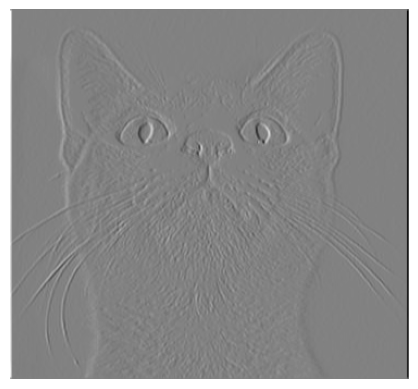

In [16]:
convolved_image2 = convolve2d(test_image_gr, kernel2)

plt.imshow(convolved_image2, cmap='gray')
plt.axis('off')

(-0.5, 3.5, 3.5, -0.5)

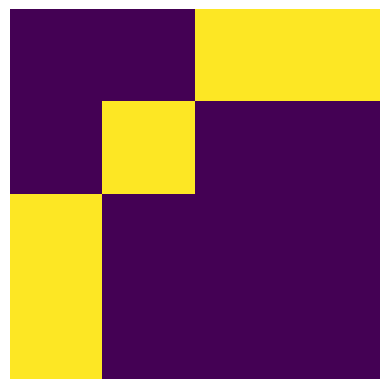

In [17]:
kernel3 = np.array([[-1, -1, 2, 2],
                   [-1, 2, -1, -1],
                   [2, -1, -1, -1],
                   [2, -1, -1, -1]])
plt.imshow(kernel3)
plt.axis('off')

(-0.5, 367.5, 340.5, -0.5)

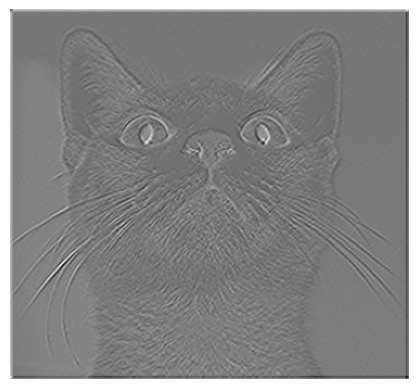

In [18]:
convolved_image3 = convolve2d(test_image_gr, kernel3)

plt.imshow(convolved_image3, cmap='gray')
plt.axis('off')

(-0.5, 367.5, 340.5, -0.5)

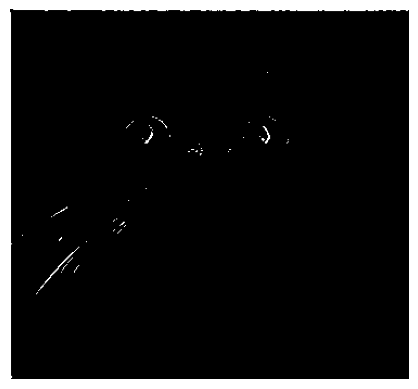

In [19]:
plt.imshow(convolved_image3 > 220, cmap='gray')
plt.axis('off')

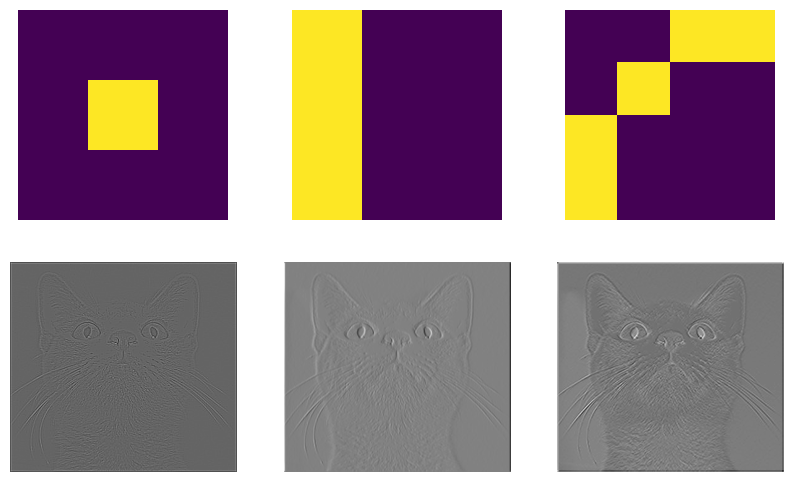

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

ax[0, 0].imshow(kernel1)
ax[0, 1].imshow(kernel2)
ax[0, 2].imshow(kernel3)


ax[1, 0].imshow(convolved_image1, cmap='gray')
ax[1, 1].imshow(convolved_image2, cmap='gray')
ax[1, 2].imshow(convolved_image3, cmap='gray')

for a in ax.ravel():
    a.axis('off')

In [21]:
img_dir 

'/Users/olamichalowska/Documents/python_class/10_CNN/train'

In [22]:
X, y = load_images(img_dir, n_images=10000, resize=(50, 50))

NameError: name 'load_images' is not defined

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

NameError: name 'X' is not defined

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [26]:
model = Sequential([
    Conv2D(16,(3,3), activation = 'relu' ), 
    Conv2D(16,(3,3), activation = 'relu' ),
    MaxPooling2D((3,3)),
    Conv2D(32,(3,3), activation = 'relu' ),
    Conv2D(32,(3,3), activation = 'relu' ),
    MaxPooling2D((2,2)), 

    Flatten( input_shape = (5, 5,32)),
    Dense(64, activation = 'relu'),


    Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer  = 'adam', metrics = ['accuracy'])

2023-02-23 13:16:31.590942: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
history = model.fit(X_train, y_train, epochs = 30)

Epoch 1/30
282/282 [==============================] - 26s 90ms/step - loss: 0.8824 - accuracy: 0.5374
Epoch 2/30
282/282 [==============================] - 25s 87ms/step - loss: 0.6729 - accuracy: 0.5783
Epoch 3/30
282/282 [==============================] - 26s 94ms/step - loss: 0.6764 - accuracy: 0.5592
Epoch 4/30
282/282 [==============================] - 30s 106ms/step - loss: 0.6783 - accuracy: 0.5561
Epoch 5/30
282/282 [==============================] - 31s 110ms/step - loss: 0.6563 - accuracy: 0.6092
Epoch 6/30
282/282 [==============================] - 33s 116ms/step - loss: 0.6230 - accuracy: 0.6516
Epoch 7/30
282/282 [==============================] - 30s 107ms/step - loss: 0.5906 - accuracy: 0.6803
Epoch 8/30
282/282 [==============================] - 28s 99ms/step - loss: 0.5624 - accuracy: 0.7109
Epoch 9/30
282/282 [==============================] - 26s 93ms/step - loss: 0.5325 - accuracy: 0.7358
Epoch 10/30
282/282 [==============================] - 26s 92ms/step - loss: 0

Accuracy on the training data:
282/282 [==============================] - 3s 12ms/step - loss: 0.0314 - accuracy: 0.9891
0.9891111254692078

Accuracy on the test data:
32/32 [==============================] - 0s 12ms/step - loss: 1.6104 - accuracy: 0.7130
0.7129999995231628


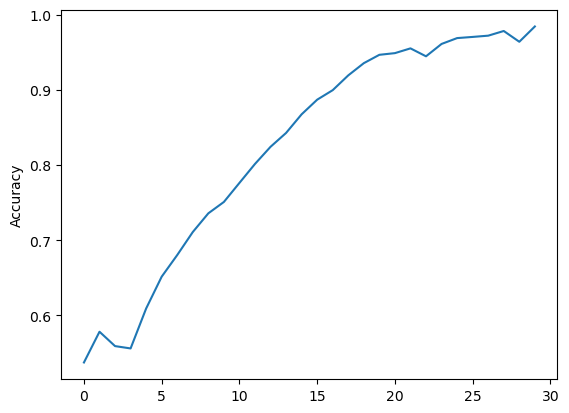

In [32]:
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')

print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

In [33]:
import keras

In [34]:
keras.models.save_model(model=model, filepath=r'/Users/olamichalowska/Documents/python_class/10_CNN/my_model', 
                           save_format='h5')

In [35]:
img_array = img_to_array(load_img(full_images[image_index], target_size=(50, 50)))

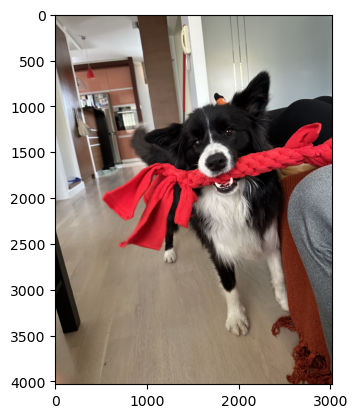

In [47]:
#unseen photo 
img = load_img(r'/Users/olamichalowska/Documents/python_class/10_CNN/IMG_0276.jpg')
plt.imshow(img)

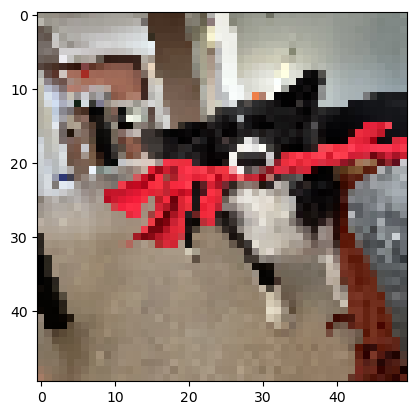

In [48]:
img = load_img(r'/Users/olamichalowska/Documents/python_class/10_CNN/IMG_0276.jpg', target_size=(50, 50))
plt.imshow(img)

In [49]:
img_array = img_to_array(img)

In [50]:
model.predict(img_array.reshape((1, 50, 50, 3))) #above 0.5 - dogs, below are cats
#model is correct

1/1 [==============================] - 0s 23ms/step


array([[0.99997246]], dtype=float32)

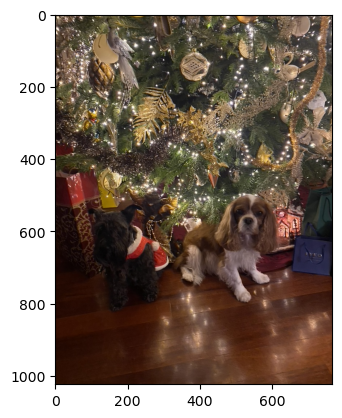

In [51]:
img = load_img(r'/Users/olamichalowska/Documents/python_class/10_CNN/0A0C00CE-3AB3-488E-A344-01A6C966B5E5_1_105_c.jpeg')
plt.imshow(img)

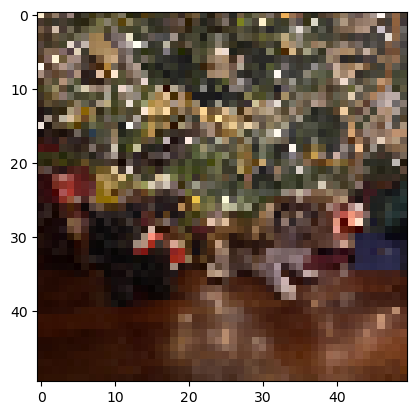

In [52]:
img = load_img(r'/Users/olamichalowska/Documents/python_class/10_CNN/0A0C00CE-3AB3-488E-A344-01A6C966B5E5_1_105_c.jpeg', target_size=(50, 50))
plt.imshow(img)

In [53]:
model.predict(img_array.reshape((1, 50, 50, 3))) #above 0.5 - dogs, below are cats
#model is correct

1/1 [==============================] - 0s 22ms/step


array([[0.99997246]], dtype=float32)

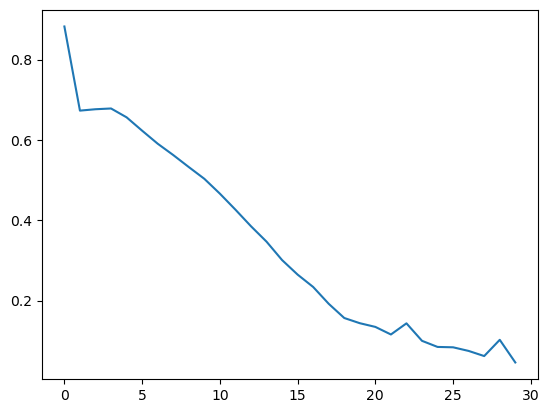

In [54]:
plt.plot(history.history['loss'])

In [55]:
model.save("ALEKSANDRA_MICHAŁOWSKA_46373_MODEL.h5")

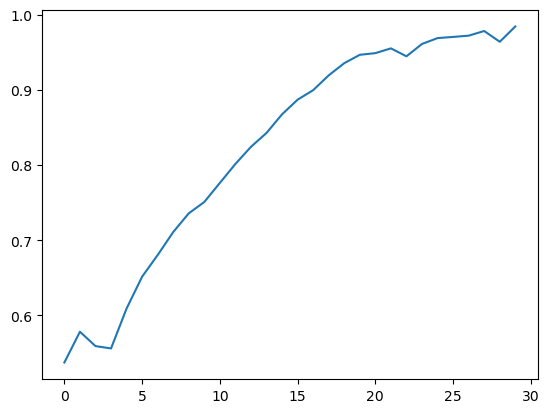

In [56]:
plt.plot(history.history['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    